<a href="https://colab.research.google.com/github/thuan1109/Data-Analyst-Portfolio/blob/main/page_view_time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the Page View Time Series Visualizer project.

  For this project I will visualize time series data using a **line chart**, **bar chart**, and **box plots**. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [5]:
#Input data
df = pd.read_csv("/content/fcc-forum-pageviews.csv")

#convert to datetime
df['date'] = pd.to_datetime(df['date'])
#set the index
df.set_index('date',inplace=True)
df.head(10)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
2016-05-15,2927
2016-05-16,2591
2016-05-17,3403


<h1> Clean Data 

by using function *quantile* to filter out days when page views were in the top 2.5% or bottom 2.5% of the dataset 

In [7]:
df_new = df[
    (df['value']>=df['value'].quantile(0.025))
   &(df['value']<=df['value'].quantile(0.975))
          ]

In [17]:
df_new['value']

date
2016-05-19     19736
2016-05-26     18060
2016-05-27     19997
2016-05-28     19044
2016-05-29     20325
               ...  
2019-11-24    138875
2019-11-29    171584
2019-11-30    141161
2019-12-01    142918
2019-12-03    158549
Name: value, Length: 1238, dtype: int64

# Visualization



1.   Draw Line Plot








Text(0, 0.5, 'Page Views')

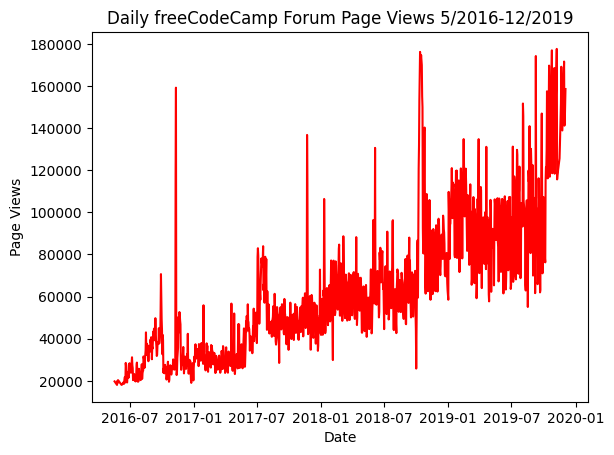

In [19]:
#draw line plot
plt.plot(df_new['value'],'r')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')




2.   Draw bar plot show average daily page views for each month grouped by year



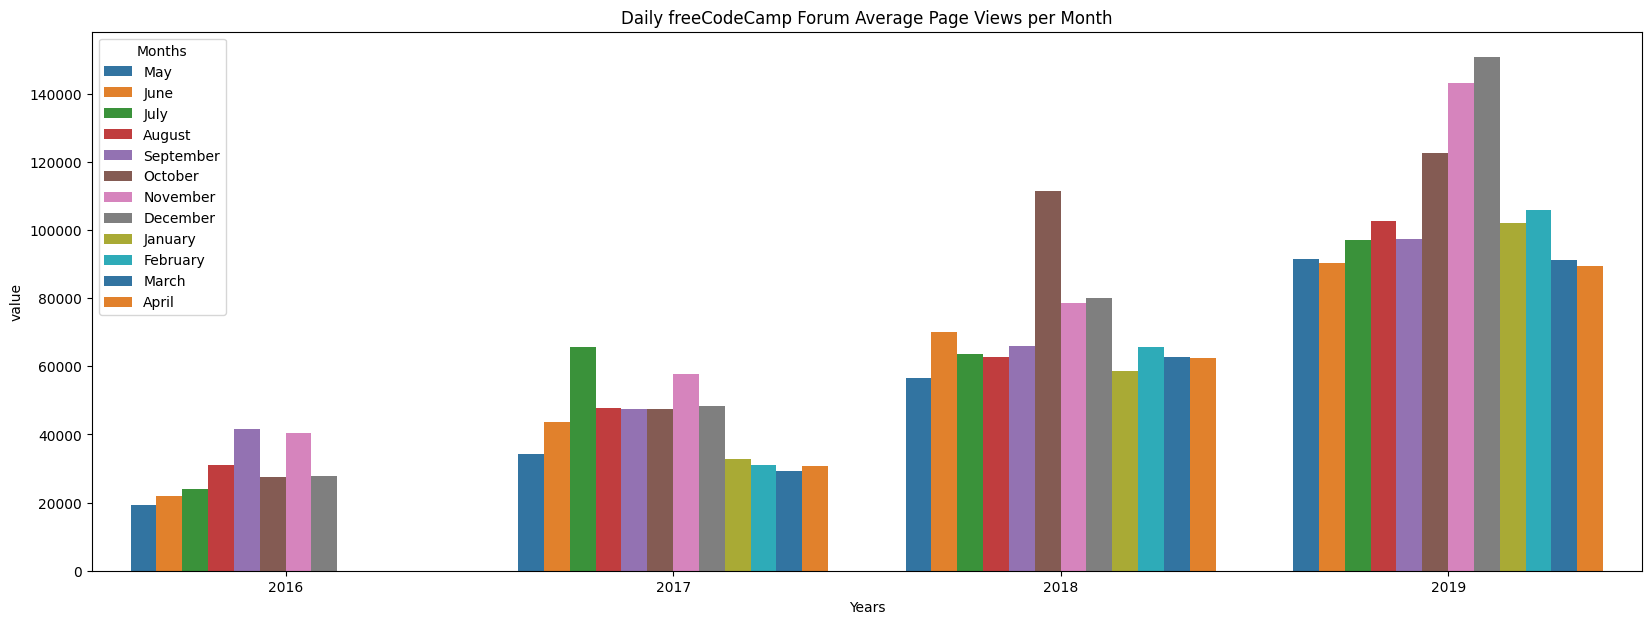

In [56]:
#draw bar plot
df_bar = df_new.copy()
#extract year and month from date 
df_bar["Years"] = df_bar.index.year
df_bar["Months"] = df_bar.index.month_name()

df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort = False)["value"].mean().round().astype(int))
df_bar = df_bar.reset_index()

fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
chart = sns.barplot(data=df_bar,x="Years",y="value",hue="Months", palette="tab10")






3. Draw box plot show how the values are distributed within a given year or month and how it compares over time 



Text(0, 0.5, 'Page Views')

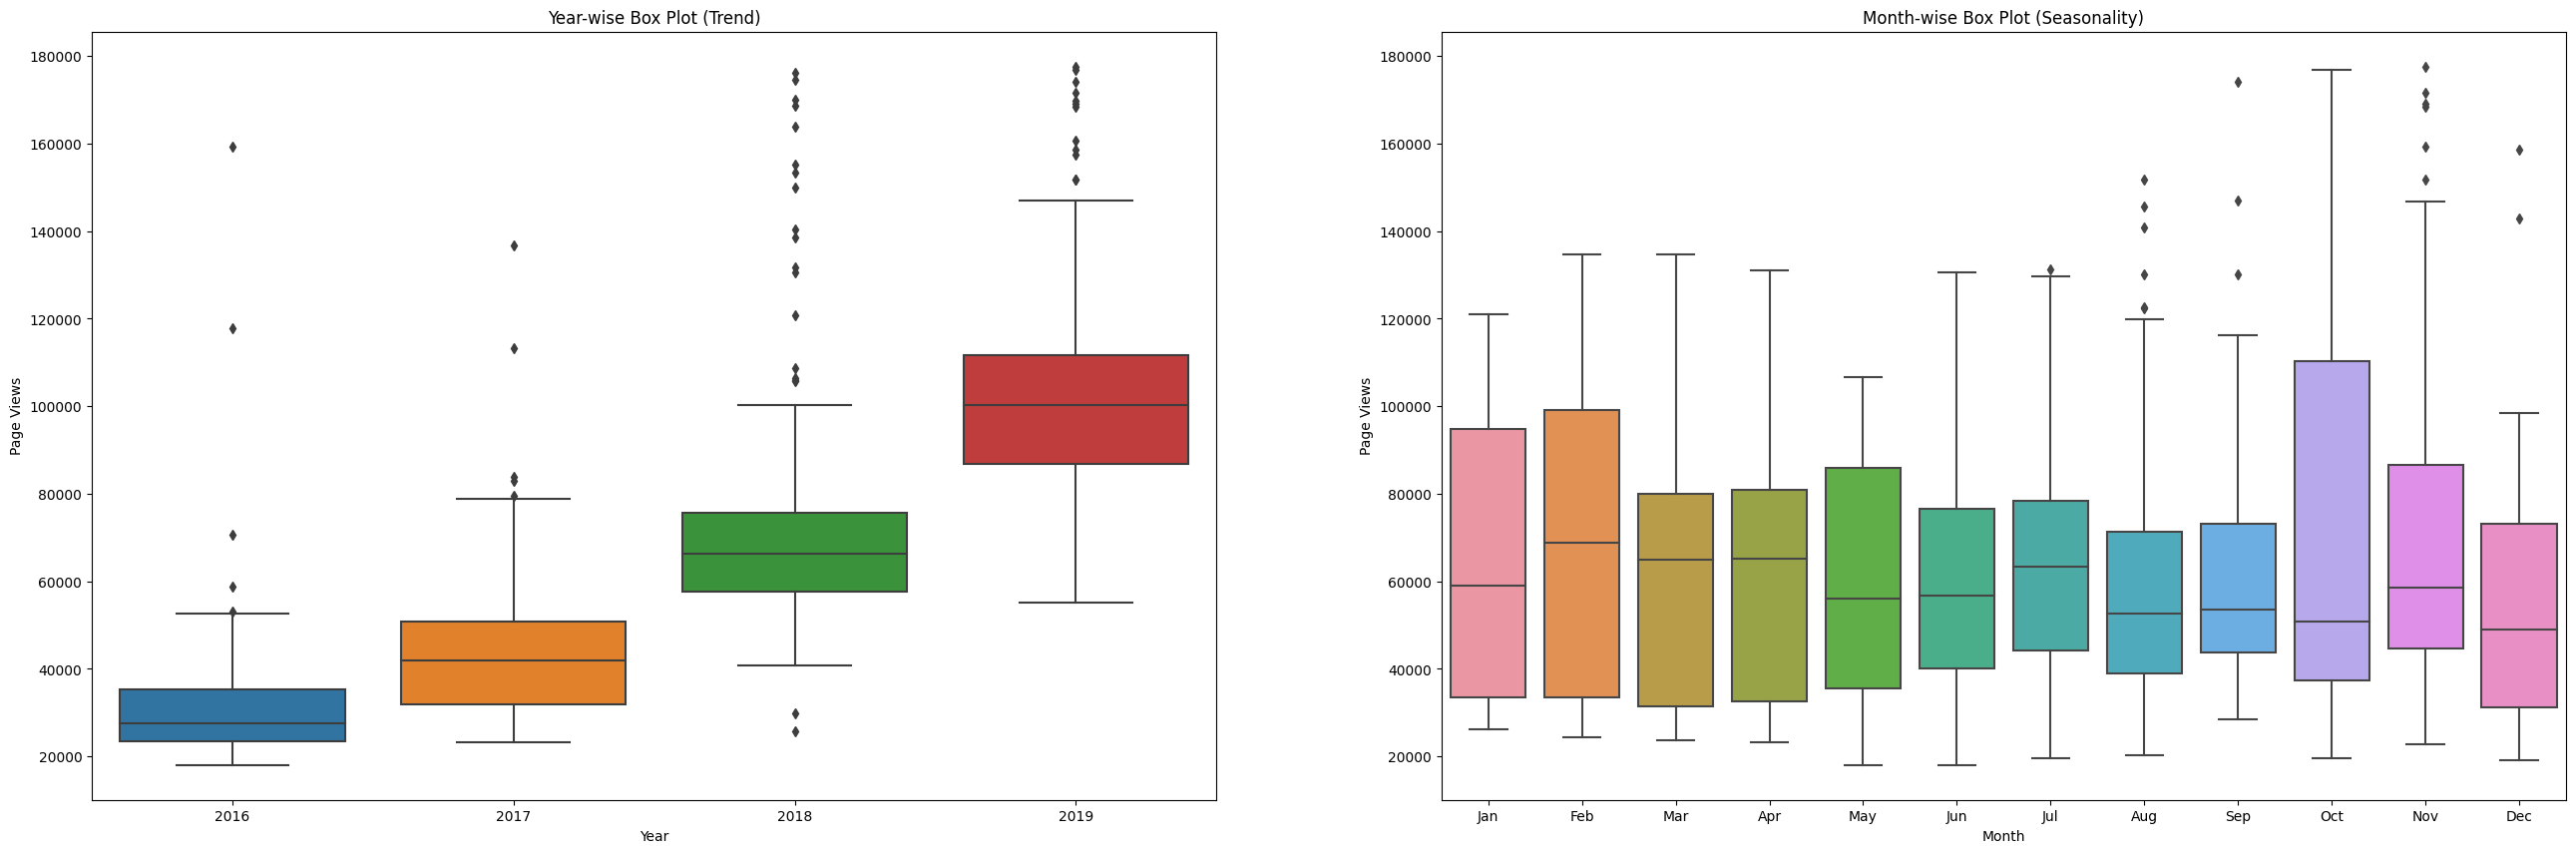

In [51]:
#Prepare data for box plot
df_box = df_new.copy()

df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

fig, axes = plt.subplots(1, 2, figsize=(32, 10))

#draw yearly boxplot
sns.boxplot(data = df_box, x="year",y="value",ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

#draw monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")


Box plot provides a lot of statistical infomation, including:


*   In year box plot: therefore, there is a difference between 4 years
*   In month box plot: data in Oct month is most scatterest and in Dec is least dispersest. And most data are not symmetric

